In [1]:
import math
import random as rnd

import numpy as np
from sklearn import datasets
from scipy.spatial.distance import pdist
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from environment.environment import Environment
from rtree.random_tree_factory import RandomTreeFactory
from genetics.individual import Individual
from genetics.selection import tournament_selection
from genetics.operators import point_mutation
from genetics.operators import crossover

In [19]:
SYMBOLS = {
    '_sum': lambda x, y: x + y,
    '_diff': lambda x, y: x - y,
    '_prod': lambda x, y: x * y,
#     '_div': lambda x, y: x/y if y != 0 else 0,
#     '_log': lambda x: math.log(x) if x > 0 else 0,
#     '_sin': lambda x: math.sin(x),
    '_dummy': lambda x: x,
    '_vars': lambda: rnd.choice(['x0', 'x1', 'x2', 'x3'])
}

ENV = Environment(SYMBOLS)

FACTORY = RandomTreeFactory(environment=ENV)

In [28]:
DATA = datasets.load_iris()['data']
N_POP = 100
N_INPUTS = 4
N_OUTPUTS = 2
N_GENS = 2
CROSSOVER_P = 0.9
MUTATION_P = 0.1
TOURNAMENT_SIZE=10

In [29]:
def cost_function(outputs):   
    dist = pdist(np.array(outputs), metric='euclidean')
    
    h = np.histogram(dist)
    p=h[0].astype(float)/h[0].sum()
    return stats.entropy(p),

In [46]:
# create initial population

population = []
variables = ['x%d'%x for x in range(0, N_INPUTS)]
for _ in range(0, N_POP):
    trees = [FACTORY.create() for _ in range(0, N_OUTPUTS)]
    population.append(Individual(trees, variables))

In [47]:
hof = []

In [48]:
# main evolution cycle

for i in range(0, N_GENS):
    
    print('Generation %d' % i)
    
    # evaluate the population
    for individual in population:
        individual.eval_on_data(DATA, cost_function, SYMBOLS)
    
    hof.append(sorted(population, key=lambda x: x.fitness)[0])
    
    # create new population
    new_population = []
    while len(new_population) < N_POP:
        child_a = tournament_selection(population, TOURNAMENT_SIZE).copy()
        child_b = tournament_selection(population, TOURNAMENT_SIZE).copy()

        # crossover
        for i in range(0, N_OUTPUTS):
            if rnd.random() < CROSSOVER_P:
                child_a.trees[i], child_b.trees[i] = crossover(child_a.trees[i], child_b.trees[i])


        for i in range(0, N_OUTPUTS):
            if rnd.random() < MUTATION_P:
                child_a.trees[i] = point_mutation(child_a.trees[i], ENV)
                child_b.trees[i] = point_mutation(child_b.trees[i], ENV)

        new_population.append(child_a)
        new_population.append(child_b)
        
    population = new_population

Generation 0
Generation 1


In [32]:
population.sort(key=lambda x: x.fitness)

_diff(_dummy(x3),_dummy(x3))
_prod(_dummy(x1),_dummy(x0))


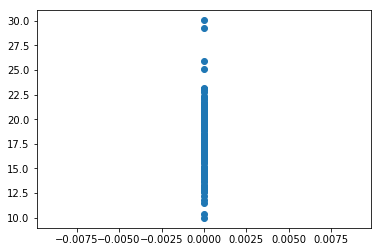

In [50]:
chosen = hof[1]
out = []

for row in DATA:
    out.append(chosen.eval_on_row(row, cost_function, SYMBOLS))

out = np.array(out)

plt.scatter(out[:,0], out[:,1])
print(chosen)

In [34]:
print(population[0])

_diff(x0,x2)
_diff(x3,x0)
